#  <CENTER>BANK NOTE AUTHENTICATION</CENTER>

### <center> PREDICT IF THE NOTE IS AUTHENTIC OR NOT</center>
Source: Kaggle Dataset (Bank Note Authentication UCI ML Repository dataset) |
link: https://www.kaggle.com/ritesaluja/bank-note-authentication-uci-data

#### Data was extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

The data consists of 5 columns:

* Variance of Wavelet Transformed image (continuous)
* Skewness of Wavelet Transformed image (continuous)
* Curtosis of Wavelet Transformed image (continuous)
* Entropy of image (continuous)
* Class (integer).
  Where class indicates whether or not a Bank Note was authentic.

## PART 1 - EXPLORATORY DATA ANALYSIS AND DATA PRE-PROCESSING

In [18]:
#Importing dependencies
import pandas as pd
import numpy as np
#Visualization
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')
#Pre processing
import missingno as msno 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, binarize
#Warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Import the dataset
df=pd.read_csv('BankNote_Authentication.csv')

In [8]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [9]:
#Shape of the data
df.shape

(1372, 5)

In [10]:
#Dataset Columns 
df.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

In [13]:
# Analyzing the first 5 rows of the data set
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


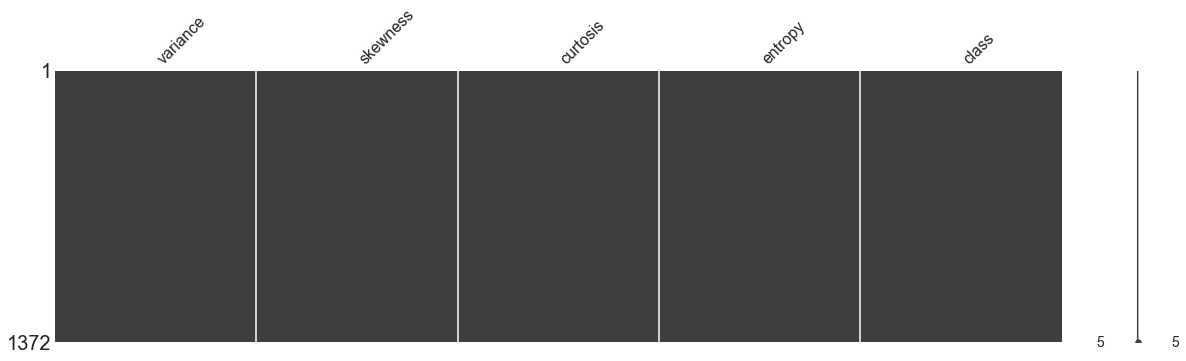

In [15]:
#Check for missing values in the dataset
msno.matrix(df, figsize=(20,5))

Dataset looks good with no missing values

In [19]:
#Checking the statistical information 

df.describe().T

,count,mean,std,min,25%,50%,75%,max
variance,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
skewness,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
curtosis,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
class,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


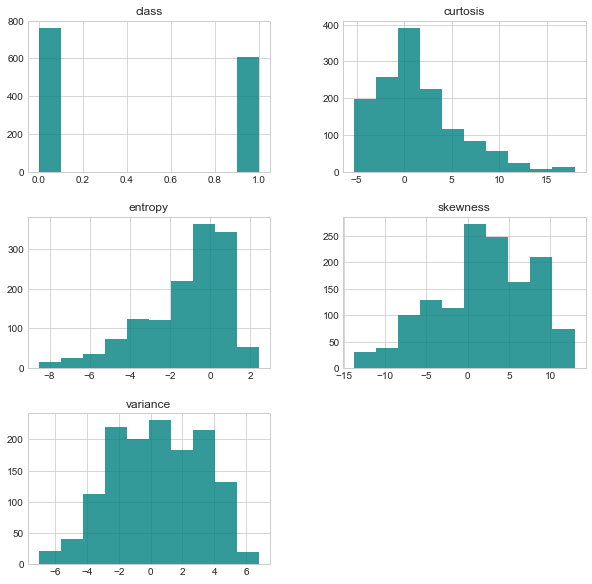

0    762
1    610
Name: class, dtype: int64


In [32]:
#Visualize the columns using histogram
df.hist(figsize = (10,10),color='teal',alpha=0.8)
plt.show()
print(df['class'].value_counts())

OBSERVATIONS:
* Dataset isn't balanced enough as more number of fake note data is present
* variance feature has a symmetrical distribution
* entropy and skewness are skewed to the left
* curtosis is skewed to the right

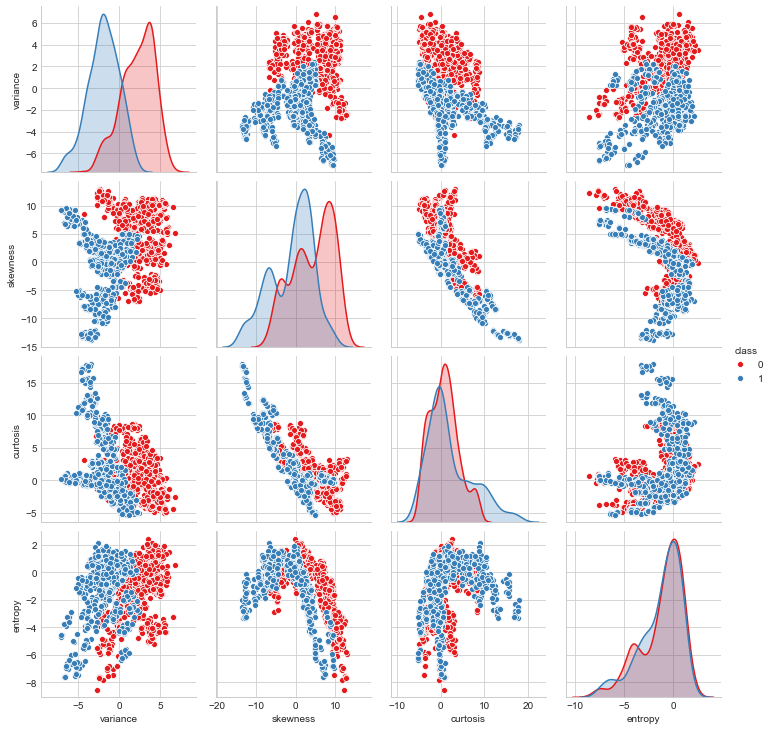

In [27]:
# Let's look at the relationship between the features
sns.pairplot(df,hue='class',palette="Set1")

OBSERVATIONS:
* Higher the variance, higher the chance of a note being fake


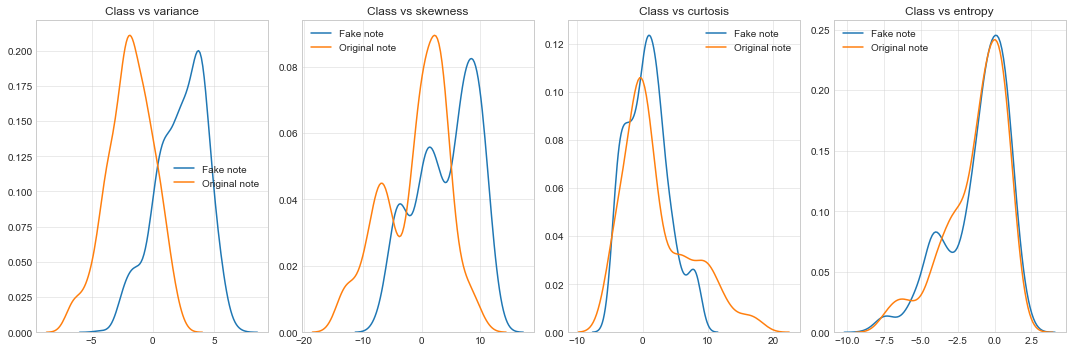

In [30]:
# Let's look at the relationship between the class and each of the features.
features = df.drop('class', axis = 1).columns.tolist()

plt.figure(figsize = (15,5))
i = 0
for col in features:
    plt.subplot(1,4,i+1)
    plt.grid(True, alpha =0.5)
    sns.kdeplot(df[col][df['class'] ==0], label = 'Fake note')
    sns.kdeplot(df[col][df['class'] ==1], label = 'Original note')
    plt.title('Class vs ' + col)
    plt.tight_layout()
    i+=1
plt.show()

### DEALING WITH CLASS IMBALANCE

Our dataset isn't balanced enough. Standard classifier algorithms have a predisposition towards classes which have higher number of cases. They keep an eye on just the greater part class information. The highlights of the minority class are treated as clamor and are regularly disregarded. Hence, there is a high likelihood of misclassification of the minority class when contrasted with the dominant part class. It can influence our model seriously. Along these lines, i have decided to use over-sampling to draw a balance between both the class. 

Over-Sampling expands the quantity of occasions in the minority class by duplicating them so as to introduce a higher portrayal of the minority class in the example. This is done as to acquire around similar number of occasions for both the classes.Let's use the resample library from python.

In [33]:
from sklearn.utils import resample,shuffle
df_majority = df[df['class']==0]
df_minority = df[df['class']==1]
df_minority_upsampled = resample(df_minority,replace=True,n_samples=762,random_state = 123)
balanced_df = pd.concat([df_minority_upsampled,df_majority])
balanced_df = shuffle(balanced_df)
balanced_df['class'].value_counts()

1    762
0    762
Name: class, dtype: int64

## PART 2 - MODEL SELECTION, BUILDING AND EVALUATION 

In [39]:
#Dividing the dataset into Independent(features) and Dependent(class) data.
X=balanced_df.iloc[:,:-1]
y=balanced_df.iloc[:,-1]

In [40]:
X.head()

,variance,skewness,curtosis,entropy
458,4.38480,-3.07290,3.04230,1.27410
653,3.35770,-4.30620,6.02410,0.18274
1212,-2.45600,-0.24418,1.40410,-0.45863
984,-0.69745,-1.76720,-0.34474,-0.12372
811,-0.86339,1.93480,-2.37290,-1.08970


In [41]:
y.head()

458     0
653     0
1212    1
984     1
811     1
Name: class, dtype: int64

In [42]:
y.value_counts()

1    762
0    762
Name: class, dtype: int64

In [45]:
#Splitting our data into 80% Training and 20% Testing Data using the train_test_split.

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print('x_train size: {}, x_test size: {}'.format(x_train.shape, x_test.shape))

x_train size: (1219, 4), x_test size: (305, 4)


In [46]:
#Feature scaling
from sklearn.preprocessing import StandardScaler 
sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [77]:
# Selecting the best model using GridSearchCV 
# Here the estimator exposes a score method that can judge the quality of the fit (or the prediction) on new data.
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

#Creating a function to select the best model.
def best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C': [1,5,10]
               }
        },
        
        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10]
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200]
            }
        },
        
        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [1,10,20],
                'kernel': ['rbf','linear']
            }
        }

    }
    
    scores = [] 
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

best_model(x_train, y_train)

,model,best_parameters,score
0,logistic_regression,{'C': 5},0.991803
1,decision_tree,"{'criterion': 'entropy', 'max_depth': 10}",0.986885
2,random_forest,{'n_estimators': 50},0.992623
3,svm,"{'C': 10, 'kernel': 'rbf'}",1.000000


As most of the classifiers do well, there isn't much difference between them.
I will be going ahead with the Random Forest classifier 

In [52]:
# Implement Random Forest classifier
classifier=RandomForestClassifier()
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [53]:
## Prediction
y_pred=classifier.predict(x_test)

In [58]:
#Example 1
classifier.predict([[2,3,4,1]])

array([0], dtype=int64)

In [74]:
#Example 1
classifier.predict([[-5,-5,10,-0.4]])

array([1], dtype=int64)

In [57]:
### Check Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
print(score)

0.9934426229508196


## PART 3- CREATE A PICKLE FILE

In [75]:
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()